# PISA Data Analysis
### Ali Rostami

Here, we are going to analyze a data set from the PISA program which is an international assessment program of education and schooloing systems through different countries. Particularly, this data, which we analyze here, contian the assessments of performance of students in Math, Science, and Reading. We have already cleaned the data and removed several unnecessary and null data using other python files (available beside this file). 

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
df = pd.read_csv('pisa_data_clean.csv')

In [3]:
res = df.groupby('Country Code').count()['Gender']
res.keys()

Index(['Albania', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China-Shanghai', 'Chinese Taipei',
       'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong-China',
       'Hungary', 'Iceland', 'Indonesia', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Jordan', 'Kazakhstan', 'Korea', 'Latvia', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Macao-China', 'Malaysia', 'Mexico',
       'Montenegro', 'Netherlands', 'New Zealand', 'Norway', 'Peru', 'Poland',
       'Portugal', 'Qatar', 'Romania', 'Russia', 'Serbia', 'Singapore',
       'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Thailand', 'Tunisia', 'Turkey', 'UK', 'USA', 'United Arab Emirates',
       'Uruguay', 'Vietnam'],
      dtype='object', name='Country Code')

In [4]:
res = df.groupby('Birth Country').count()['Gender']
res.keys()

Index(['Afghanistan', 'Albania', 'Argentina', 'Australia', 'Austria',
       'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria',
       'Canada', 'Cape Verde', 'Caribbean', 'Chile', 'China', 'Chinese Taipei',
       'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Czechia',
       'Denmark', 'Egypt', 'Estonia', 'Ethiopia', 'FYR Macedonia', 'Fiji',
       'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan',
       'Korea, Republic of', 'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Macao', 'Malaysia', 'Mexico', 'Montenegro', 'Morocco',
       'Netherlands', 'Netherlands Antilles', 'New Zealand', 'Nicaragua',
       'Norway', 'Occupied Palestinian Territory', 'Pakistan', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar',
       'Republic of Korea', 

## Explorative Data Analysis

Here, we explore the data using different visualization for a better understanding of the data and the relations in it. First we look how is the distribution of the number of assessed students over the countries. In the following bar chart, we can see that the most of data is from Mexico, Italy, Spain, and Canada. Also, we can see that there are only a few data from Lichtenstein and Iceland. 

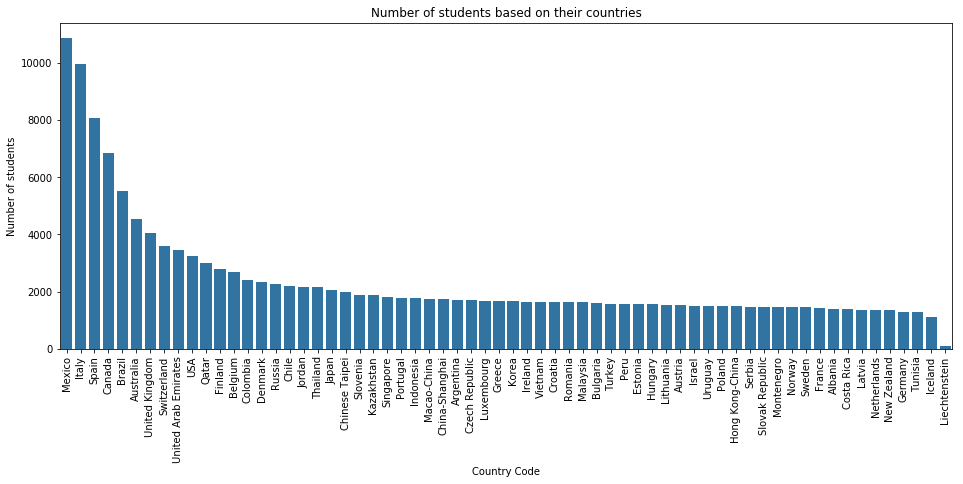

In [11]:
plt.figure(figsize = [16, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Country Code', color = base_color, order=df['Country Code'].value_counts().index)
plt.title('Number of students based on their countries')
plt.xticks(rotation='vertical');
plt.ylabel('Number of students');

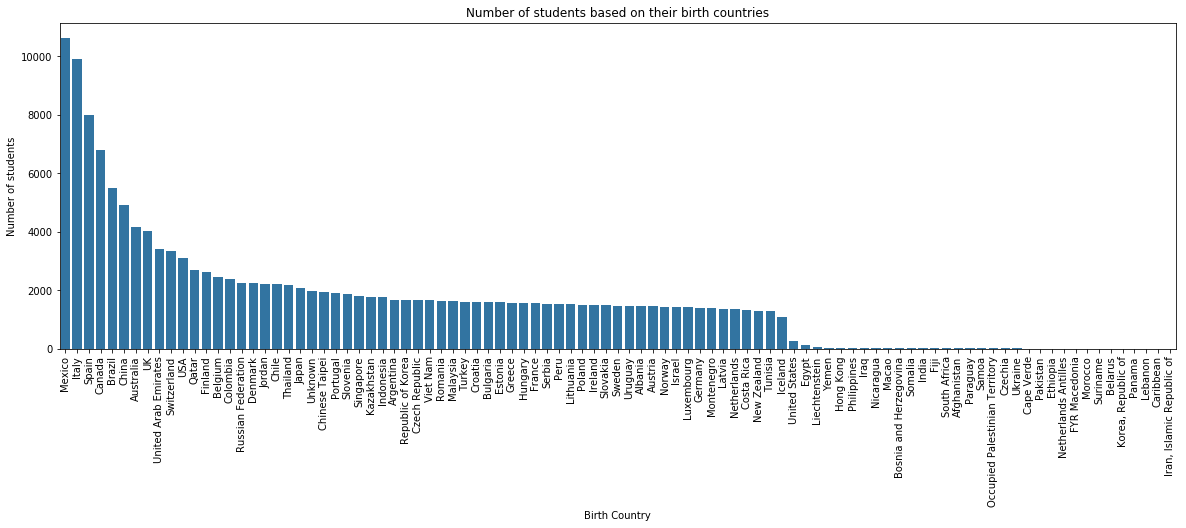

In [17]:
plt.figure(figsize = [20, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Birth Country', color = base_color, order=df['Birth Country'].value_counts().index)
plt.title('Number of students based on their birth countries')
plt.xticks(rotation='vertical');
plt.ylabel('Number of students');

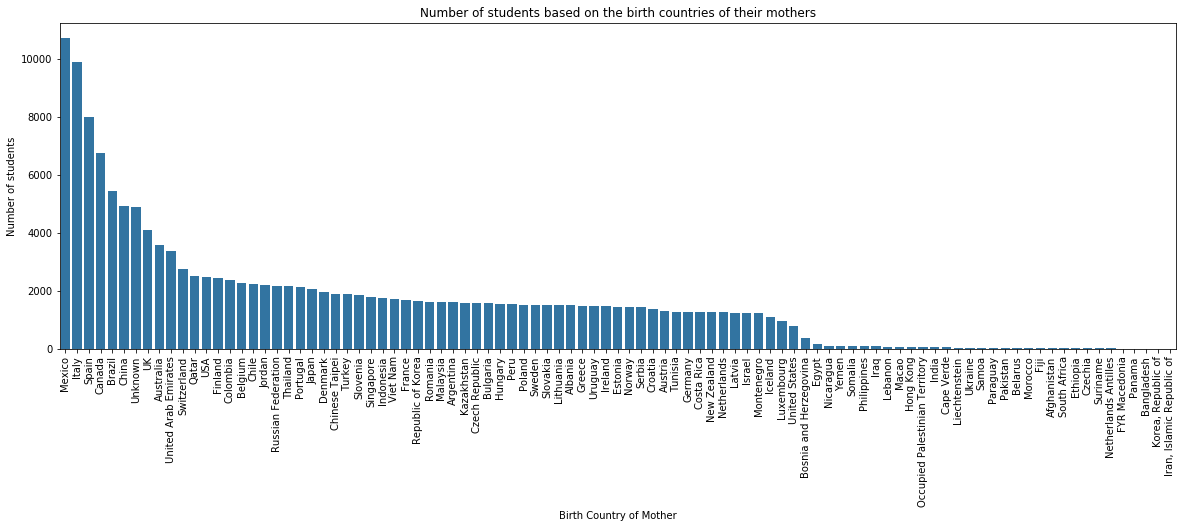

In [23]:
plt.figure(figsize = [20, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Birth Country of Mother', color = base_color, order=df['Birth Country of Mother'].value_counts().index)
plt.title('Number of students based on the birth countries of their mothers')
plt.xticks(rotation='vertical');
plt.ylabel('Number of students');

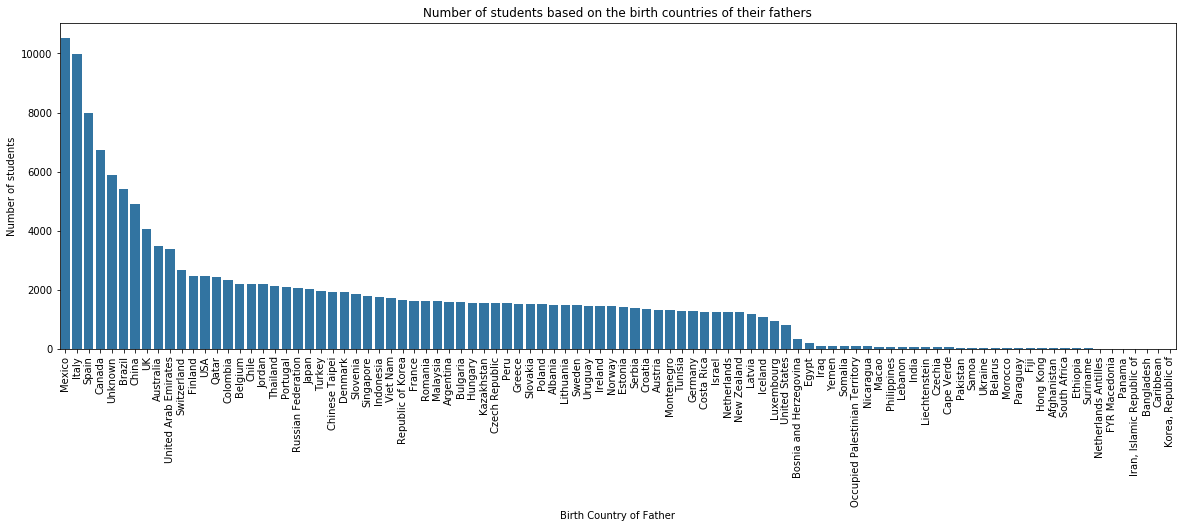

In [24]:
plt.figure(figsize = [20, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Birth Country of Father', color = base_color, order=df['Birth Country of Father'].value_counts().index)
plt.title('Number of students based on the birth countries of their fathers')
plt.xticks(rotation='vertical');
plt.ylabel('Number of students');

Another factor is the background of students wether their parents have similar birthplaces as them. Here, we compute a number which shows this factor. This number can be 1 if the student and their parents are born all in the same country, 2 if one of the parents is born in a different country than the student. Finally, the numnber 3 shows that the parents and the student are all born in different countries. In the followings, first figure shows the distribution of this factor. So, most of the students are born in the same country as their parents.    

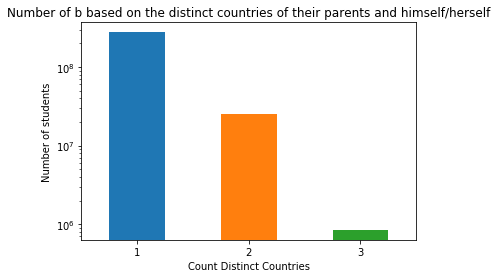

In [10]:
df['Merged Birth Countries'] = df['Birth Country of Mother'] + "," +  df['Birth Country of Father'] + "," + df['Birth Country'];

def count_distinct_countries(str):
    s = set()
    for t in str.split(","):
        s.add(t)
    return len(s)

df['Count Distinct Countries'] = df['Merged Birth Countries'].apply(count_distinct_countries);
res = df.groupby('Count Distinct Countries').sum()['Birth Year']
res.plot.bar(logy=True)
plt.title('Number of students based on the distinct countries of their parents and himself/herself.')
plt.ylabel('Number of students');
plt.xticks(rotation='horizontal');

<Figure size 3600x1440 with 0 Axes>

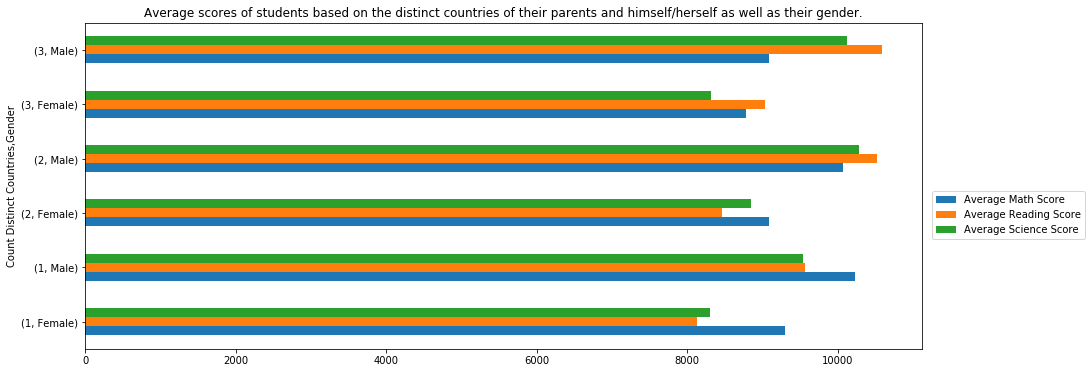

In [78]:
plt.figure(figsize = [50, 20])
res = df.groupby(['Count Distinct Countries','Gender']).var()[['Average Math Score', 'Average Reading Score', 'Average Science Score']]
ax = res.plot.barh(figsize=(15,6))
ax.legend(bbox_to_anchor=(1.2, 0.5))
# plt.subplots_adjust(top = 1.4)
plt.title('Average scores of students based on the distinct countries of their parents and himself/herself as well as their gender.')
plt.xticks(rotation='horizontal');

Now, we can look at the distribution and the correlations of the scores of Math, Reading, and Science considering all students from all countries.

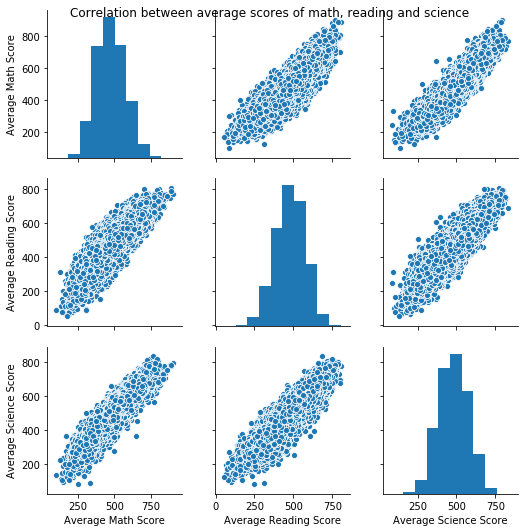

In [29]:
pair_plot = sb.pairplot(data = df, vars=["Average Math Score", "Average Reading Score", "Average Science Score"]);
pair_plot.fig.suptitle("Correlation between average scores of math, reading and science");

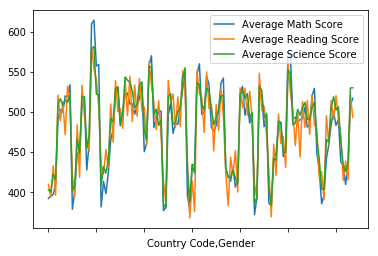

In [83]:
res = df.groupby(['Country Code','Gender']).mean()[['Average Math Score', 'Average Reading Score', 'Average Science Score']]
res.plot()

Now, we see how related are the scores of Reading, Math, and Science to each other. As it can be seen they have high correlation with each other.

In [ ]:
df.plot.scatter(x='Max Reading Score', y='Max Math Score');

In [ ]:
df.plot.scatter(x='Max Reading Score', y='Max Science Score');

Now, we want to compare the students based on the birht place of himself/herself and his/her parents.The following visualization shows that the most of students have the same of birthplace as their parents.

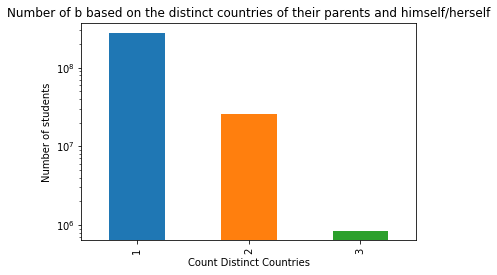

In [ ]:
plt.figure(figsize = [17, 6])
plt.subplot(1, 3, 1)
sb.boxplot(x = df['Count Distinct Countries'], y = df['Max Math Score']);
plt.subplot(1, 3, 2)
sb.boxplot(x = df['Count Distinct Countries'], y = df['Max Reading Score']);
plt.subplot(1, 3, 3)
sb.boxplot(x = df['Count Distinct Countries'], y = df['Max Science Score']);

Another intersting factor is the distribution of different scores based on countries. 

In [ ]:
plt.figure(figsize = [17, 6])

df.groupby('Country Code').sum()
# math_score_country_order = df.groupby('Country')['Math Score'].mean().sort_values(ascending = False).index
# reading_score_country_order = df.groupby('Country')['Reading Score'].mean().sort_values(ascending = False).index
# science_score_country_order = df.groupby('Country')['Science Score'].mean().sort_values(ascending = False).index

plt.subplot(1, 3, 1)
sb.boxplot(x = df['Average Math Score'], y = df['Country Code'], order = math_score_country_order, color = sb.color_palette()[9]);
plt.ylabel('Countries (ordered descendingly by score ranking)')
plt.title('Math score distributions by country');

plt.subplot(1, 3, 2)
sb.boxplot(x = df['Average Reading Score'], y = df['Country Code'], order = reading_score_country_order, color = sb.color_palette()[9]);
plt.ylabel(''); # Remove the redundant label
plt.title('Reading score distributions by country');

plt.subplot(1, 3, 3)
sb.boxplot(x = df['Average Science Score'], y = df['Country'], order = science_score_country_order, color = sb.color_palette()[9]);
plt.ylabel(''); # Remove the redundant label
plt.title('Science score distributions by country');

In [ ]:
res = df.groupby('Gender').mean()[['Average Math Score','Average Reading Score','Average Science Score']]
math = [res['Average Math Score'][0],res['Average Math Score'][1]]
reading = [res['Average Reading Score'][0],res['Average Reading Score'][1]]
science = [res['Average Science Score'][0],res['Average Science Score'][1]]

female = [res['Average Math Score'][0],res['Average Reading Score'][0],res['Average Science Score'][0]]
male   = [res['Average Math Score'][1],res['Average Reading Score'][1],res['Average Science Score'][1]]
index = ['Average Math Score', 'Average Reading Score', 'Average Science Score']
df = pd.DataFrame({'female': female,'male': male}, index=index)
ax = df.plot.bar(rotation='vertical')
# plt.figure(figsize = [14, 6])
# plt.subplot(1, 3, 1)
# df.groupby('Gender').mean().plot.bar(title='Test');
# plt.xticks(rotation='horizontal');
# plt.subplot(1, 3, 2)
# df.groupby('Gender')['Average Reading Score'].mean().plot.bar(title='Test');
# plt.xticks(rotation='horizontal');
# plt.subplot(1, 3, 3)
# df.groupby('Gender')['Average Science Score'].mean().plot.bar(title='Test');
# plt.xticks(rotation='horizontal');

In [ ]:
df.plot.scatter(x='Experience with Pure Math in School',y='Max Math Score')

KeyError: 'Max Math Score'

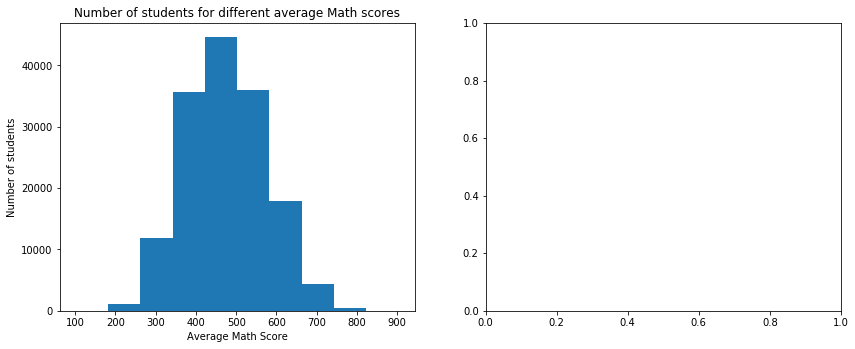

In [8]:
#df[['Average Math Score','Max Math Score','Average Reading Score','Max Reading Score']].hist()
plt.figure(figsize = [14, 18])
plt.subplot(3, 2, 1)
#bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(df['Average Math Score'])#, bins = bin_edges)
plt.title("Number of students for different average Math scores")
plt.xlabel('Average Math Score');
plt.ylabel('Number of students')

plt.subplot(3, 2, 2)
#bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(df['Max Math Score'])#, bins = bin_edges)
plt.title("Number of students for different max Math scores")
plt.xlabel('Max Math Score');
plt.ylabel('Number of students')

plt.subplot(3, 2, 3)
#bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(df['Average Reading Score'])#, bins = bin_edges)
plt.title("Number of students for different average Reading scores")
plt.xlabel('Average Reading Score');
plt.ylabel('Number of students')

plt.subplot(3, 2, 4)
#bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(df['Max Reading Score'])#, bins = bin_edges)
plt.title("Number of students for different max Reading scores")
plt.xlabel('Max Reading Score');
plt.ylabel('Number of students')

plt.subplot(3, 2, 5)
#bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(df['Average Science Score'])#, bins = bin_edges)
plt.title("Number of students for different average Science scores")
plt.xlabel('Average Science Score');
plt.ylabel('Number of students')

plt.subplot(3, 2, 6)
#bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(df['Max Science Score'])#, bins = bin_edges)
plt.title("Number of students for different max Science scores")
plt.xlabel('Max Science Score');
plt.ylabel('Number of students')

In [ ]:
# plt.figure(figsize = [14, 6])
# plt.subplot(1, 2, 1)
# #bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
# plt.hist(df['Teacher Student Relations'])#, bins = bin_edges)
# plt.title("Teacher student relations")
# plt.xlabel('Teacher student relations');
# plt.ylabel('Number of students')

# plt.subplot(1, 2, 2)
# #bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
# plt.hist(df['Teacher Behavior'])#, bins = bin_edges)
# plt.title("Teacher Behavior")
# plt.xlabel('Teacher Behavior');
# plt.ylabel('Number of students')
df[['Teacher Student Relations','Teacher Behavior']].corr()

In [ ]:
grid = sb.pairplot(data = df, vars=["Average Math Score", "Max Math Score"]);
grid.fig.suptitle("Pair-by-pair representation of different scores' correlation", y = 1);